Random Forest Performance:
MAE: $33,026.92
RMSE: $50,825.89
R²: 0.8029
Adjusted R²: 0.8026102466135709 


/var/folders/mv/xsvbxmjj66z58bcv2fl8cd3r0000gn/T/ipykernel_44898/48389681.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=importances, palette='viridis')


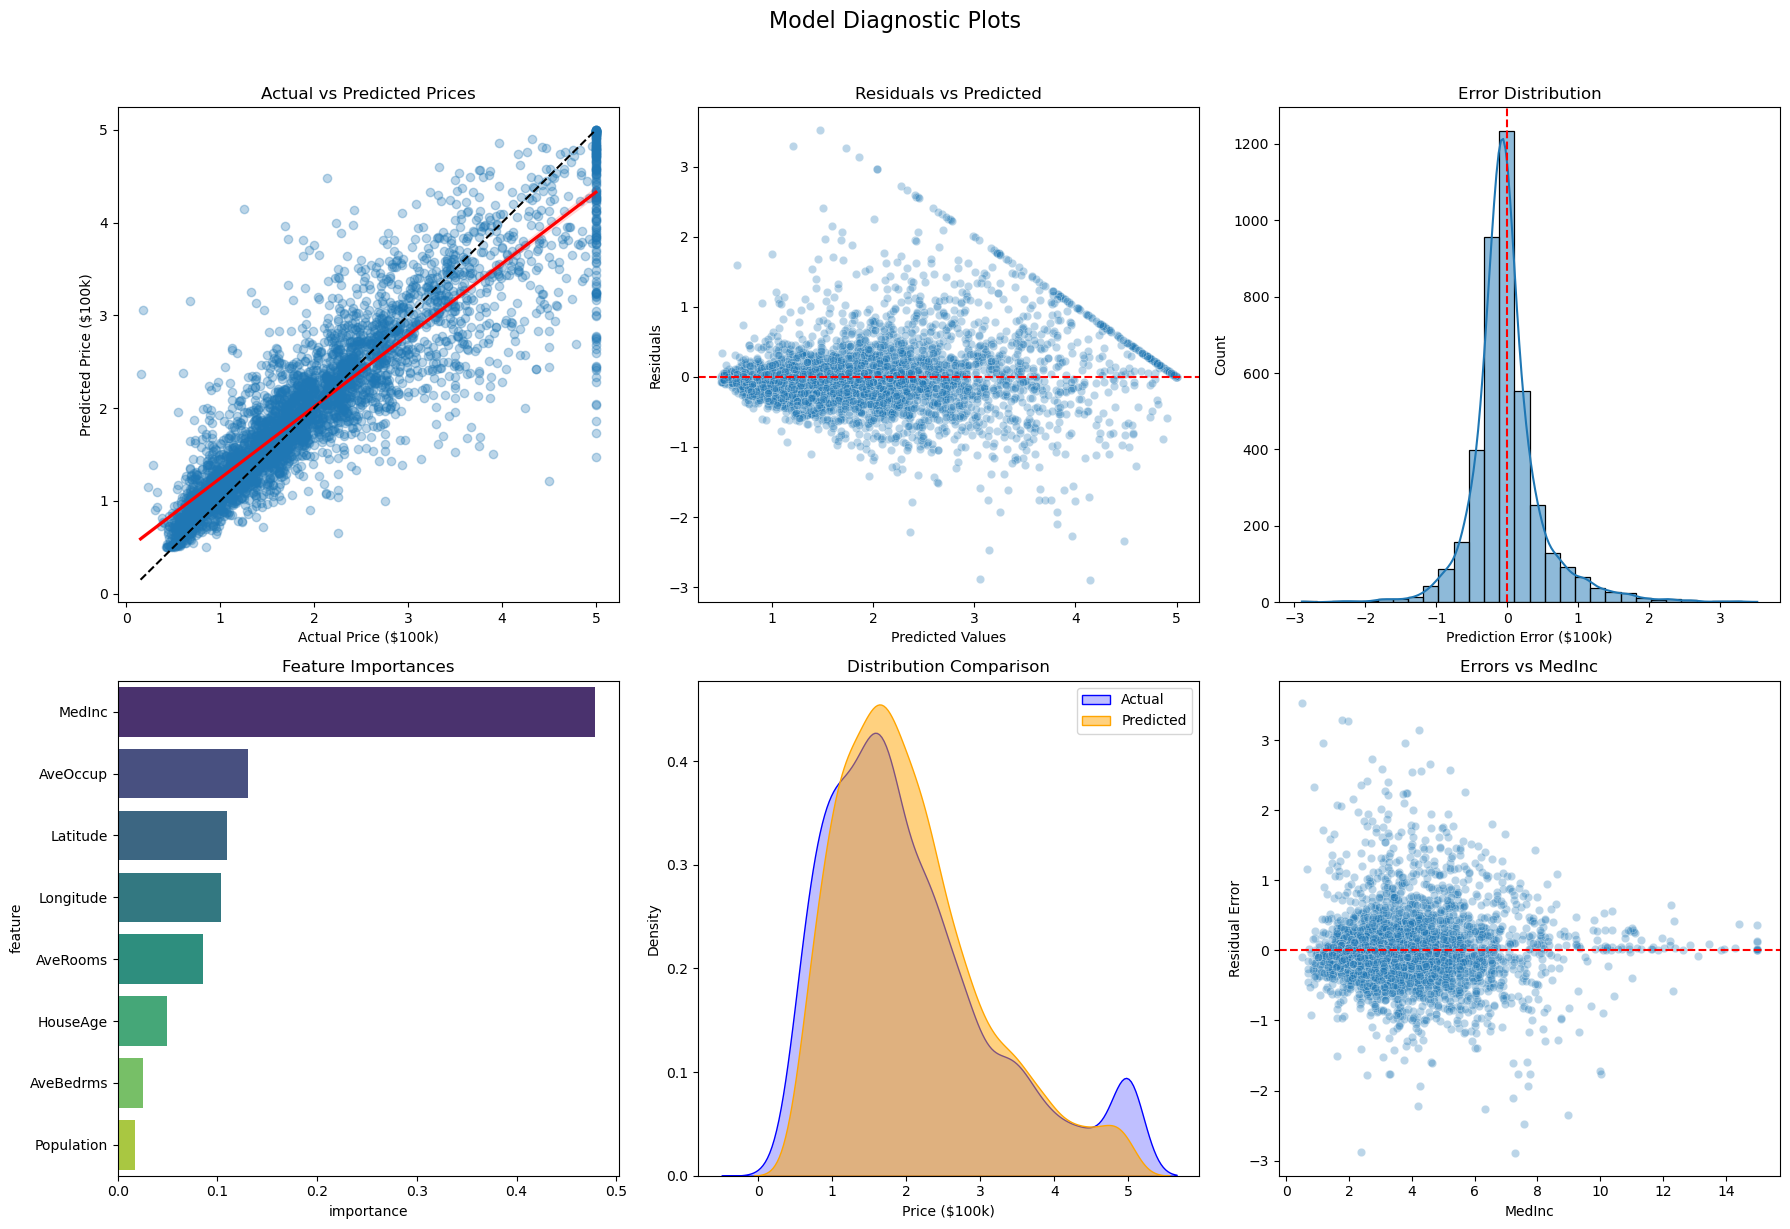


Partial Dependence Plots:


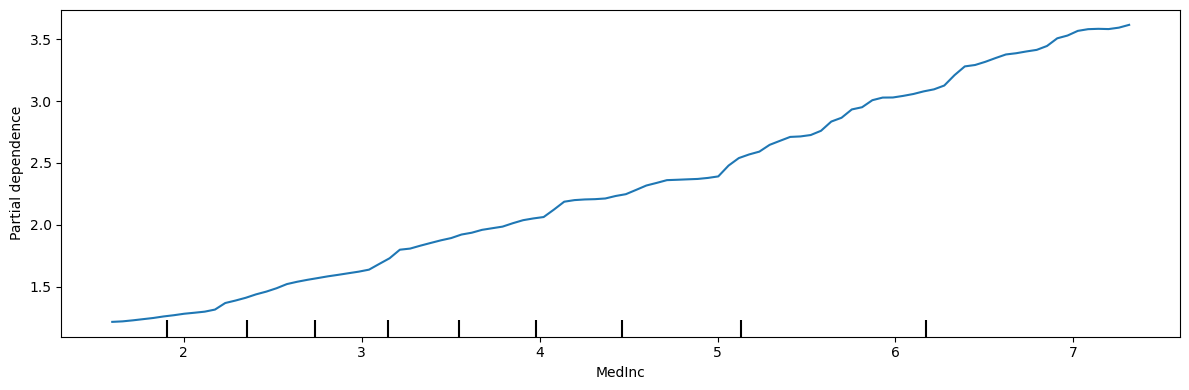

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([4.38917435])

In [244]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

# Load data
cali = fetch_california_housing()
df = pd.DataFrame(cali.data, columns=cali.feature_names)
df['Price'] = cali.target  # Keep original units (100k USD)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    df.drop('Price', axis=1),
    df['Price'],
    test_size=0.2,
    random_state=42
)

# Train Random Forest
rf = RandomForestRegressor(
    n_estimators=200,
    min_samples_leaf=5,
    max_features=0.5,
    n_jobs=-1,
    random_state=42
)
rf.fit(X_train, y_train)
preds = rf.predict(X_test)

# Metrics
print("Random Forest Performance:")
print(f"MAE: ${mean_absolute_error(y_test, preds)*100000:,.2f}")
print(f"RMSE: ${np.sqrt(mean_squared_error(y_test, preds))*100000:,.2f}")
print(f"R²: {r2_score(y_test, preds):.4f}")
score = r2_score(y_test, preds)
print(f"Adjusted R²: {1 - (1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)} ")

# Set up plot grid
plt.figure(figsize=(18, 12))
plt.suptitle('Model Diagnostic Plots', y=1.02, fontsize=16)

# 1. Actual vs Predicted Plot
plt.subplot(2, 3, 1)
sns.regplot(x=y_test, y=preds, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.xlabel('Actual Price ($100k)')
plt.ylabel('Predicted Price ($100k)')
plt.title('Actual vs Predicted Prices')

# 2. Residual Plot
residuals = y_test - preds
plt.subplot(2, 3, 2)
sns.scatterplot(x=preds, y=residuals, alpha=0.3)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted')

# 3. Error Distribution
plt.subplot(2, 3, 3)
sns.histplot(residuals, kde=True, bins=30)
plt.axvline(x=0, color='r', linestyle='--')
plt.xlabel('Prediction Error ($100k)')
plt.title('Error Distribution')

# 4. Feature Importance (Bar Plot)
importances = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

plt.subplot(2, 3, 4)
sns.barplot(x='importance', y='feature', data=importances, palette='viridis')
plt.title('Feature Importances')

# 5. Actual vs Predicted Distribution
plt.subplot(2, 3, 5)
sns.kdeplot(y_test, label='Actual', color='blue', fill=True)
sns.kdeplot(preds, label='Predicted', color='orange', fill=True, alpha=0.5)
plt.xlabel('Price ($100k)')
plt.title('Distribution Comparison')
plt.legend()

# 6. Error vs Feature Value (Top Feature)
top_feature = importances.iloc[0]['feature']
plt.subplot(2, 3, 6)
sns.scatterplot(x=X_test[top_feature], y=residuals, alpha=0.3)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel(top_feature)
plt.ylabel('Residual Error')
plt.title(f'Errors vs {top_feature}')

plt.tight_layout()
plt.show()

from sklearn.inspection import PartialDependenceDisplay
print("\nPartial Dependence Plots:")
fig, ax = plt.subplots(figsize=(12, 4))

PartialDependenceDisplay.from_estimator(
    rf, 
    X_train, 
    features=[importances.iloc[0]['feature']], 
    ax=ax
)
plt.tight_layout()
plt.show()
rf.predict(scaler.transform(cali.data[0].reshape(1,-1)))

### New Data Prediction

In [236]:
import pickle
with open('california_housing_rf.pkl', 'wb') as f:
    pickle.dump(rf, f)

In [240]:
with open('california_housing_rf.pkl', 'rb') as f:
     loaded_model = pickle.load(f)

In [242]:
loaded_model.predict(scaler.transform(cali.data[0].reshape(1,-1)))

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([4.38917435])